In [48]:
!pip install tensorflow

In [49]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


 

!wget https://github.com/alexeygrigorev/mlbookcamp-code/releases/download/chapter7-model/xception_v4_large_08_0.894.h5 -O clothing-model.h5

In [50]:
!wget https://i.pinimg.com/originals/6a/ef/bb/6aefbbc556900e05a336d8a616a310d6.jpg -O emotion.png

--2022-12-18 20:17:58--  https://i.pinimg.com/originals/6a/ef/bb/6aefbbc556900e05a336d8a616a310d6.jpg
Resolving i.pinimg.com (i.pinimg.com)... 23.64.114.37, 23.64.114.31, 2a04:4e42:22::84
Connecting to i.pinimg.com (i.pinimg.com)|23.64.114.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47599 (46K) [image/jpeg]
Saving to: ‘emotion.png’

emotion.png         100%[===================>]  46.48K  --.-KB/s    in 0.01s   

2022-12-18 20:17:58 (4.21 MB/s) - ‘emotion.png’ saved [47599/47599]



In [51]:
!python -V

Python 3.9.12


In [52]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import preprocess_input   #our model is xception

In [53]:
model = keras.models.load_model('best_model_0.454.hdf5')

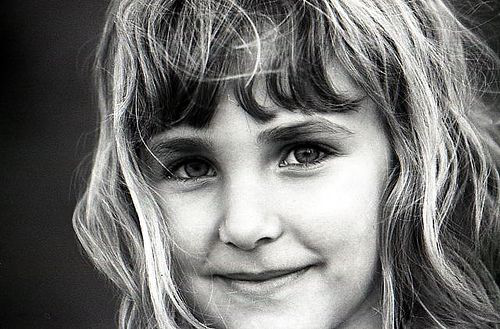

In [54]:
load_img('emotion.png')

In [55]:
img = load_img('emotion.png', target_size=(150, 150))

x = np.array(img)

X = np.array([x])

X = preprocess_input(X)

In [56]:
preds = model.predict(X)

1/1 [==============================] - 1s 732ms/step


In [58]:
preds

array([[0.00226714, 0.00254925, 0.04006647, 0.01061088, 0.5375435 ,
        0.32105047, 0.0694285 , 0.01648381]], dtype=float32)

In [59]:
classes = [
    'anger',
    'contempt',
    'disgust',
    'fear',
    'happiness',
    'neutrality',
    'sadness',
    'surprise'
]

In [60]:
dict(zip(classes, preds[0]))

{'anger': 0.0022671367,
 'contempt': 0.002549252,
 'disgust': 0.040066466,
 'fear': 0.010610881,
 'happiness': 0.5375435,
 'neutrality': 0.32105047,
 'sadness': 0.069428496,
 'surprise': 0.016483808}

tensorflow is often too big to store models in. TFlite is smaller. Let's try it.

## Convert Keras to TF-Lite

In [61]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()

with open('emotion-model.tflite', 'wb') as f_out:
    f_out.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp5pnn63kr/assets


INFO:tensorflow:Assets written to: /tmp/tmp5pnn63kr/assets
2022-12-18 20:19:20.397971: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-12-18 20:19:20.398027: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-12-18 20:19:20.398208: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmp5pnn63kr
2022-12-18 20:19:20.442720: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2022-12-18 20:19:20.442764: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmp5pnn63kr
2022-12-18 20:19:20.566569: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2022-12-18 20:19:21.061573: I tensorflow/cc/saved_model/loader.cc:213] Running initialization op on SavedModel bundle at path: /tmp/tmp5pnn63kr
2022-12-18 20:19:21.210466: I tensorflow/cc/saved_model/loader.cc:305] SavedModel

In [62]:
!ls -lh

total 1.2G
-rw-rw-r-- 1 jovyan jovyan 1.1M Nov  9 04:41 07-augmentations.ipynb
-rw-rw-r-- 1 jovyan jovyan 133K Nov  9 04:41 07-neural-nets-test.ipynb
-rw-rw-r-- 1 jovyan jovyan 647K Dec  1 01:19 07-neural-nets-train.ipynb
-rw-rw-r-- 1 jovyan jovyan  39K Dec 18 18:48 a.jpeg
-rw-rw-r-- 1 jovyan jovyan  87M Dec 18 17:22 best_model_0.359.hdf5
-rw-rw-r-- 1 jovyan jovyan  87M Dec 18 17:27 best_model_0.392.hdf5
-rw-rw-r-- 1 jovyan jovyan  87M Dec 18 17:35 best_model_0.421.hdf5
-rw-rw-r-- 1 jovyan jovyan  87M Dec 18 17:32 best_model_0.424.hdf5
-rw-rw-r-- 1 jovyan jovyan  87M Dec 18 17:30 best_model_0.427.hdf5
-rw-rw-r-- 1 jovyan jovyan  87M Dec 18 17:24 best_model_0.428.hdf5
-rw-rw-r-- 1 jovyan jovyan  87M Dec 18 17:43 best_model_0.436.hdf5
-rw-rw-r-- 1 jovyan jovyan  87M Dec 18 17:40 best_model_0.438.hdf5
-rw-rw-r-- 1 jovyan jovyan  87M Dec 18 17:38 best_model_0.441.hdf5
-rw-rw-r-- 1 jovyan jovyan  87M Dec 18 00:21 best_model_0.449.hdf5
-rw-rw-r-- 1 jovyan jovyan  87M Dec 18 17:46 best_model_

In [42]:
import tensorflow.lite as tflite

In [63]:
interpreter = tflite.Interpreter(model_path='emotion-model.tflite')
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

In [64]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [65]:
classes = [
    'anger',
    'contempt',
    'disgust',
    'fear',
    'happiness',
    'neutrality',
    'sadness',
    'surprise'
]

In [76]:

dict(zip(classes, preds[0]))

{'anger': 0.00226713,
 'contempt': 0.0025492492,
 'disgust': 0.04006644,
 'fear': 0.01061086,
 'happiness': 0.53754497,
 'neutrality': 0.32104924,
 'sadness': 0.06942833,
 'surprise': 0.016483791}

This tflite is still the one in tensorflow. Let us try a totally different tflite.

## Removing TF dependency

In [66]:
from PIL import Image

In [71]:
with Image.open('emotion.png') as img:
    img = img.resize((150, 150), Image.NEAREST)

In [72]:
def preprocess_input(x):
    x /= 127.5
    x -= 1.
    return x

In [73]:
x = np.array(img, dtype='float32')
X = np.array([x])

X = preprocess_input(X)

In [74]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [75]:
classes = [
    'anger',
    'contempt',
    'disgust',
    'fear',
    'happiness',
    'neutrality',
    'sadness',
    'surprise'
]

In [76]:

dict(zip(classes, preds[0]))

{'anger': 0.00226713,
 'contempt': 0.0025492492,
 'disgust': 0.04006644,
 'fear': 0.01061086,
 'happiness': 0.53754497,
 'neutrality': 0.32104924,
 'sadness': 0.06942833,
 'surprise': 0.016483791}

## Simpler way of doing it.

In [77]:
!pip install keras-image-helper

  Using cached keras_image_helper-0.0.1-py3-none-any.whl (4.6 kB)


In [78]:
!pip install --extra-index-url https://google-coral.github.io/py-repo/ tflite_runtime

Looking in indexes: https://pypi.org/simple, https://google-coral.github.io/py-repo/
  Using cached tflite_runtime-2.11.0-cp39-cp39-manylinux2014_x86_64.whl (2.5 MB)


In [79]:
import tflite_runtime.interpreter as tflite
from keras_image_helper import create_preprocessor

In [81]:
interpreter = tflite.Interpreter(model_path='emotion-model.tflite')
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

In [85]:
preprocessor = create_preprocessor('xception', target_size=(150, 150))

In [86]:
url = 'https://i.pinimg.com/originals/6a/ef/bb/6aefbbc556900e05a336d8a616a310d6.jpg'
X = preprocessor.from_url(url)

In [87]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [88]:
classes = [
    'anger',
    'contempt',
    'disgust',
    'fear',
    'happiness',
    'neutrality',
    'sadness',
    'surprise'
]

In [89]:


dict(zip(classes, preds[0]))

{'anger': 0.00226713,
 'contempt': 0.0025492492,
 'disgust': 0.04006644,
 'fear': 0.01061086,
 'happiness': 0.53754497,
 'neutrality': 0.32104924,
 'sadness': 0.06942833,
 'surprise': 0.016483791}